In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
def ann1(raw,TARGET_NAME):

    raw_dataset = pd.read_csv(raw)
    dataset = raw_dataset.copy()
    dataset.tail()

    dataset.isna().sum()

    train_dataset = dataset.sample(frac=0.8, random_state=0)

    test_dataset = dataset.drop(train_dataset.index)

    train_dataset.describe().transpose()

    train_features = train_dataset.copy()

    test_features = test_dataset.copy()

    train_labels = train_features.pop(TARGET_NAME)

    test_labels = test_features.pop(TARGET_NAME)

    train_dataset.describe().transpose()[['mean', 'std']]
    print('Size of Training Data',train_features.shape)
    print('Size of Testing  Data',test_features.shape)

    r= test_features.copy();
    scaler = MinMaxScaler()
    # transform data
    scaled = scaler.fit_transform(train_features)
    train_features=pd.DataFrame(scaled,columns=list(train_features.columns))
    scaled = scaler.fit_transform(test_features)
    #inscaled = scaler.inverse_transform(test_features)
    test_features=pd.DataFrame(scaled,columns=list(test_features.columns))
    #intest_features=pd.DataFrame(inscaled,columns=list(test_features.columns))
    normalizer = tf.keras.layers.Normalization(axis=-1)

    normalizer.adapt(np.array(train_features))

    print(normalizer.mean.numpy())

    first = np.array(train_features[:1])

    def build_and_compile_model():
        model = keras.Sequential([
           layers.Dense(64, activation='relu'),
           layers.Dense(64, activation='relu'),
           layers.Dense(1)
        ])

        model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.01),
                    metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError()])
        return model

    ann_model = build_and_compile_model()
    #ann_model.summary()

    history = ann_model.fit(
        train_features,
        train_labels,
        validation_split=0.2,
        verbose=1, epochs=100)

    pred=ann_model.predict(test_features)

    prediction=pd.DataFrame(pred)

    prediction=prediction.rename(columns={0:'Prediction'})


    results=pd.DataFrame(r.values,columns=list(r.columns))

    results['actual']=pd.DataFrame(test_labels.values)
    results['prediction']=pd.DataFrame(prediction.values)
    results['abbLoass']=results['actual'].values-results['prediction'].values
    print('Training Using Electric Data Completed')
    return ann_model,results,history

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
def ann(raw,TARGET_NAME):

    raw_dataset = pd.read_csv(raw)
    dataset = raw_dataset.copy()
    dataset.tail()

    dataset.isna().sum()

    train_dataset = dataset.sample(frac=0.8, random_state=0)

    test_dataset = dataset.drop(train_dataset.index)

    train_dataset.describe().transpose()

    train_features = train_dataset.copy()

    test_features = test_dataset.copy()

    train_labels = train_features.pop(TARGET_NAME)

    test_labels = test_features.pop(TARGET_NAME)

    train_dataset.describe().transpose()[['mean', 'std']]
    print('Size of Training Data',train_features.shape)
    print('Size of Testing  Data',test_features.shape)
    normalizer = tf.keras.layers.Normalization(axis=-1)

    normalizer.adapt(np.array(train_features))

    print(normalizer.mean.numpy())

    first = np.array(train_features[:1])

    def build_and_compile_model():
        model = keras.Sequential([
           normalizer,
           layers.Dense(64, activation='relu'),
           layers.Dense(64, activation='relu'),
           layers.Dense(1)
        ])

        model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.001),
                    metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError()])
        return model

    ann_model = build_and_compile_model()
    ann_model.summary()

    history = ann_model.fit(
        train_features,
        train_labels,
        validation_split=0.2,
        verbose=1, epochs=100)

    pred=ann_model.predict(test_features)

    prediction=pd.DataFrame(pred)

    prediction=prediction.rename(columns={0:'Prediction'})


    results=pd.DataFrame(test_features.values,columns=['Distance', 'TimeNeeded_in_Seconds', 'primary', 'secondary_link',
           'NotFound', 'tertiary_link', 'trunk', 'service', 'residential',
           'tertiary', 'track', 'primary_link', 'secondary', 'unclassified',
           'motorway_link', 'motorway', 'Change_In_Elevation', 'precipIntensity',
           'temperature', 'visibility', 'Speed_Ratio', 'Jam_Factor'])

    results['actual']=pd.DataFrame(test_labels.values)
    results['prediction']=pd.DataFrame(prediction.values)
    results['abbLoass']=results['actual'].values-results['prediction'].values
    print('Training Using Diesel Data Completed')
    return ann_model,results,history

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense, Dropout, Activation
from keras.layers import Conv1D, Add, MaxPooling1D, BatchNormalization
from keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPooling1D
from keras.regularizers import l2
import tensorflow as tf
from keras.models import Model


def LSTMNetwork(raw,TARGET_NAME):
    raw_dataset = pd.read_csv(raw)
    dataset = raw_dataset.copy()
    dataset.tail()

    dataset.isna().sum()

    train_dataset = dataset.sample(frac=0.8, random_state=0)

    test_dataset = dataset.drop(train_dataset.index)

    train_dataset.describe().transpose()

    train_features = train_dataset.copy()

    test_features = test_dataset.copy()

    train_labels = train_features.pop(TARGET_NAME)

    test_labels = test_features.pop(TARGET_NAME)

    train_dataset.describe().transpose()[['mean', 'std']]
    print('Size of Training Data',train_features.shape)
    print('Size of Testing  Data',test_features.shape)

    r= test_features.copy();
    scaler = MinMaxScaler()
    # transform data
    scaled = scaler.fit_transform(train_features)
    train_features=pd.DataFrame(scaled,columns=list(train_features.columns))
    scaled = scaler.fit_transform(test_features)
    #inscaled = scaler.inverse_transform(test_features)
    test_features=pd.DataFrame(scaled,columns=list(test_features.columns))
    #intest_features=pd.DataFrame(inscaled,columns=list(test_features.columns))
    normalizer = tf.keras.layers.Normalization(axis=-1)

    normalizer.adapt(np.array(train_features))

    print(normalizer.mean.numpy())

    first = np.array(train_features[:1])

    x_input = Input(shape=(train_features.shape[1],))
    emb = Embedding(train_features.shape[1], 30, input_length=train_features.shape[1])(x_input)
    bi_cnn =  Bidirectional(LSTM(32,return_sequences=True, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))(emb)
    bi_cnn =  Bidirectional(LSTM(32, return_sequences=True))(bi_cnn)
    bi_cnn =  Bidirectional(LSTM(31))(bi_cnn)

    x = Dropout(0.5)(bi_cnn)
    x=Dense(100, activation='linear')(x)
    x = Dropout(0.5)(x)
    x_output = Dense(1, activation='tanh')(x)
    x_output=Activation("linear")(x_output)
    model1 = Model(inputs=x_input, outputs=x_output)
    opt=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop")
    model1.compile(optimizer=opt, loss='mean_squared_error',
                   metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError()])

    model1.summary()

    history = model1.fit(
        train_features,
        train_labels,
        batch_size=500,
        validation_split=0.2,
        verbose=1, epochs=50)

    pred=model1.predict(test_features)

    prediction=pd.DataFrame(pred)

    prediction=prediction.rename(columns={0:'Prediction'})


    results=pd.DataFrame(r.values,columns=list(r.columns))

    results['actual']=pd.DataFrame(test_labels.values)
    results['prediction']=pd.DataFrame(prediction.values)
    results['abbLoass']=results['actual'].values-results['prediction'].values
    print('Training Completed')
    return model1,results,history

In [ ]:
import math
import time
import random
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


print(tf.__version__)

Diesel = '/content/Diesel_Vehicles_Final_Training_Samples.csv'

Electric= '/content/Electric_Vehicles_Final_Training_Samples.csv'

TARGET_NAME = 'Energy_Consumed'

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.8])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Energy Consuption]')
    plt.legend()
    plt.grid(True)
def plot_loss1(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.3])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Energy Consuption]')
    plt.legend()
    plt.grid(True)


# from ann import ann

## Diesel Data

ann_model,results,history=ann(Diesel,TARGET_NAME)

results.to_csv('dieselDataResults.csv')

## Electric Data
# from annElectric import ann1
ann_modelE,resultsE,historyE=ann1(Electric,TARGET_NAME)

resultsE.to_csv('ElectricDataResults.csv')

actual1=results['actual']
predicted1=results['prediction']
MAE=mean_absolute_error(actual1,predicted1)
MSE=mean_squared_error(actual1,predicted1)
RMSE=np.sqrt(mean_squared_error(actual1,predicted1))


print("MAE  Diesel vehicle",MAE)
print("MSE  Diesel vehicle",MSE)
print("RMSE Diesel vehicle",RMSE)

actual2=resultsE['actual']
predicted2=resultsE['prediction']

MAE1=mean_absolute_error(actual2,predicted2)
MSE1=mean_squared_error(actual2,predicted2)
RMSE1=np.sqrt(mean_squared_error(actual2,predicted2))

print("MAE  Electric vehicle",MAE1)
print("MSE  Electric vehicle",MSE1)
print("RMSE Electric vehicle",RMSE1)
pd.DataFrame(np.array([[MAE,MSE,RMSE],[MAE1,MSE1,RMSE1]]),columns=['MAE','MSE','RMSE'])


val=pd.DataFrame(np.array([[MAE,MSE,RMSE],[MAE1,MSE1,RMSE1]]),columns=['MAE','MSE','RMSE'])
f=pd.DataFrame(['Diesel','Electric'])
tab=pd.concat([f,val],axis=1)
tab.to_csv('ErrorResults.csv')

dis=sum(results['Distance'])
ene=sum(results['prediction'])
Edis=sum(resultsE['Distance'])
Eene=sum(resultsE['prediction'])

EnergyConsumed100kmDiesel=(ene/dis)*100
EnergyConsumed100kmElectric=(Eene/Edis)*100
s1=results.sort_values(by="Distance",ascending=True)
s2=resultsE.sort_values(by="Distance",ascending=True)




2.8.0
Size of Training Data (43793, 22)
Size of Testing  Data (10948, 22)
[[2.6741196e+02 4.8456177e+01 2.7635702e-01 5.6287535e-03 0.0000000e+00
  7.9921418e-05 4.5669349e-03 3.9732382e-02 1.6480945e-01 4.4904452e-02
  1.2559084e-04 2.0265788e-02 2.6027012e-01 2.1829972e-02 3.0941054e-02
  1.6155561e-02 3.7246305e-01 6.4489676e-04 7.6169968e+01 4.6450195e+00
  9.1981488e-01 2.7965212e-01]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 22)               45        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                1472      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                          

In [ ]:
LSTMModelDiesel,resultLSTMDiesel,historyLSTMDiesel=LSTMNetwork(Diesel,TARGET_NAME)

LSTMModelDiesel.save('LSTMModelDiesel1.h5')
resultLSTMDiesel.to_csv('LSTMdieselDataResults.csv')
actual1=resultLSTMDiesel['actual']
predicted1=resultLSTMDiesel['prediction']
MAE=mean_absolute_error(actual1,predicted1)
MSE=mean_squared_error(actual1,predicted1)
RMSE=np.sqrt(mean_squared_error(actual1,predicted1))

print("LSTM Training MAE  Diesel vehicle",MAE)
print("LSTM Training MSE  Diesel vehicle",MSE)
print("LSTM Training RMSE Diesel vehicle",RMSE)

Size of Training Data (43793, 22)
Size of Testing  Data (10948, 22)
[[8.0251344e-02 6.6530514e-03 2.7635702e-01 5.6287535e-03 0.0000000e+00
  7.9921418e-05 4.5669349e-03 3.9732382e-02 1.6480945e-01 4.4904452e-02
  1.2559084e-04 2.0265788e-02 2.6027012e-01 2.1829972e-02 3.0941054e-02
  1.6155561e-02 6.4989448e-01 1.0076521e-02 5.9921408e-01 4.6450198e-01
  4.2458087e-01 1.3428000e-01]]
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22)]              0         
                                                                 
 embedding (Embedding)       (None, 22, 30)            660       
                                                                 
 bidirectional (Bidirectiona  (None, 22, 64)           16128     
 l)                                                              
                                                                 
 bi

In [ ]:
LSTMModelElectric,resultLSTMElectric,historyLSTMElectric=LSTMNetwork(Electric,TARGET_NAME)
resultLSTMElectric.to_csv('LSTMElectricDataResults.csv')
LSTMModelElectric.save('LSTMModelElectric1.h5')

actual1=resultLSTMElectric['actual']
predicted1=resultLSTMElectric['prediction']
MAE=mean_absolute_error(actual1,predicted1)
MSE=mean_squared_error(actual1,predicted1)
RMSE=np.sqrt(mean_squared_error(actual1,predicted1))
print("LSTM Training MAE  Electric vehicle",MAE)
print("LSTM Training MSE  Electric vehicle",MSE)
print("LSTM Training RMSE Electric vehicle",RMSE)


Size of Training Data (45777, 24)
Size of Testing  Data (11444, 24)
[[2.8134702e-02 9.8801553e-03 2.2522227e-01 5.5377102e-03 0.0000000e+00
  2.7306302e-04 5.5377171e-03 3.7278622e-02 1.7102478e-01 5.0210785e-02
  6.5535125e-05 1.4133747e-02 2.7656889e-01 1.6318236e-02 3.6863483e-02
  1.7672621e-02 9.9997085e-01 6.0591972e-01 1.0216061e-02 4.6578813e-01
  4.6277654e-01 2.7500820e-01 4.4369182e-01 1.3692814e-01]]
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 24, 30)            720       
                                                                 
 bidirectional_3 (Bidirectio  (None, 24, 64)           16128     
 nal)                                                            
                                       

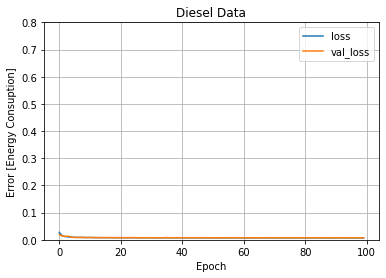

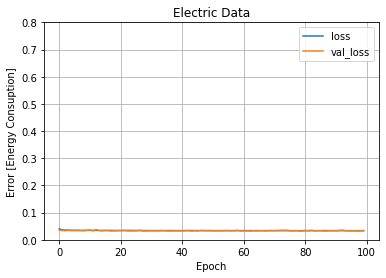

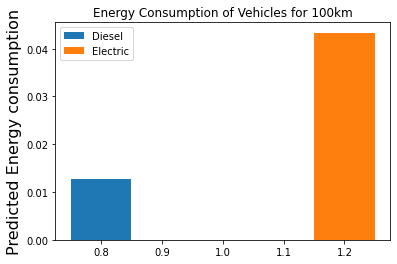

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1)
plt.title('Diesel Data')
plot_loss(history)
plt.savefig('DieselTrainingError.jpg')
plt.figure(2)
plt.title('Electric Data')
plot_loss(historyE)
plt.savefig('ElectricTrainingError.jpg')
# create data
x = 1
y1 = [EnergyConsumed100kmDiesel]
y2 = [EnergyConsumed100kmElectric]
width = 0.1
plt.figure(3)
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.legend(['Diesel','Electric'])
plt.title('Energy Consuption of Vehicles for 100km')
plt.ylabel('Predicted Energy consumption', fontsize=16)
plt.title('Energy Consumption of Vehicles for 100km')
plt.savefig('1.jpg')
plt.show()

Text(0.5, 1.0, 'Diesel LSTM Model Loss')

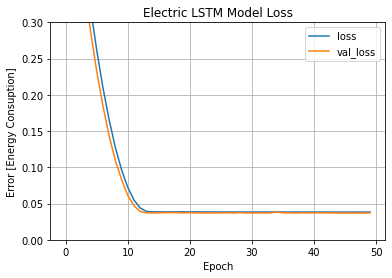

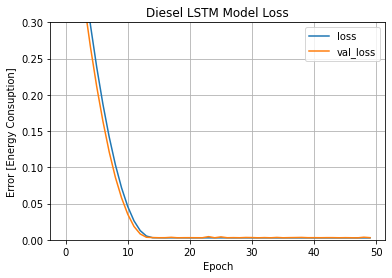

In [ ]:
def plot_loss1(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.3])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Energy Consuption]')
    plt.legend()
    plt.grid(True)
plot_loss1(historyLSTMElectric)
plt.title('Electric LSTM Model Loss')
plt.figure(2)
plot_loss1(historyLSTMDiesel)
plt.title('Diesel LSTM Model Loss')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
def load_data(raw,TARGET_NAME):
    raw_dataset = pd.read_csv(raw)
    dataset = raw_dataset.copy()
    dataset.tail()

    dataset.isna().sum()

    train_dataset = dataset.sample(frac=0.8, random_state=0)

    test_dataset = dataset.drop(train_dataset.index)

    train_dataset.describe().transpose()

    train_features = train_dataset.copy()

    test_features = test_dataset.copy()

    train_labels = train_features.pop(TARGET_NAME)

    test_labels = test_features.pop(TARGET_NAME)

    train_dataset.describe().transpose()[['mean', 'std']]
    print('Size of Training Data',train_features.shape)
    print('Size of Testing  Data',test_features.shape)

    r= test_features.copy();
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(train_features)
    train_features=pd.DataFrame(scaled,columns=list(train_features.columns))
    scaled = scaler.fit_transform(test_features)
    test_features=pd.DataFrame(scaled,columns=list(test_features.columns))
    normalizer = tf.keras.layers.Normalization(axis=-1)

    normalizer.adapt(np.array(train_features))

    print(normalizer.mean.numpy())

    first = np.array(train_features[:1])
    return [train_features,train_labels,test_features,test_labels]

In [ ]:
train_features,train_labels,test_features,test_labels=load_data(Diesel,TARGET_NAME)

D1=LSTMModelDiesel.evaluate(test_features,test_labels)

D2=ann_model.evaluate(test_features,test_labels)

Size of Training Data (43793, 22)
Size of Testing  Data (10948, 22)
[[8.0251344e-02 6.6530514e-03 2.7635702e-01 5.6287535e-03 0.0000000e+00
  7.9921418e-05 4.5669349e-03 3.9732382e-02 1.6480945e-01 4.4904452e-02
  1.2559084e-04 2.0265788e-02 2.6027012e-01 2.1829972e-02 3.0941054e-02
  1.6155561e-02 6.4989448e-01 1.0076521e-02 5.9921408e-01 4.6450198e-01
  4.2458087e-01 1.3428000e-01]]
343/343 [==============================] - 1s 2ms/step - loss: 0.0421 - mean_squared_error: 0.0050 - mean_absolute_error: 0.0421


In [ ]:
train_features,train_labels,test_features,test_labels=load_data(Electric,TARGET_NAME)

E1=LSTMModelElectric.evaluate(test_features,test_labels)

E2=ann_modelE.evaluate(test_features,test_labels)

Size of Training Data (45777, 24)
Size of Testing  Data (11444, 24)
[[2.8134702e-02 9.8801553e-03 2.2522227e-01 5.5377102e-03 0.0000000e+00
  2.7306302e-04 5.5377171e-03 3.7278622e-02 1.7102478e-01 5.0210785e-02
  6.5535125e-05 1.4133747e-02 2.7656889e-01 1.6318236e-02 3.6863483e-02
  1.7672621e-02 9.9997085e-01 6.0591972e-01 1.0216061e-02 4.6578813e-01
  4.6277654e-01 2.7500820e-01 4.4369182e-01 1.3692814e-01]]
358/358 [==============================] - 1s 2ms/step - loss: 0.0606 - mean_squared_error: 0.0574 - mean_absolute_error: 0.0606


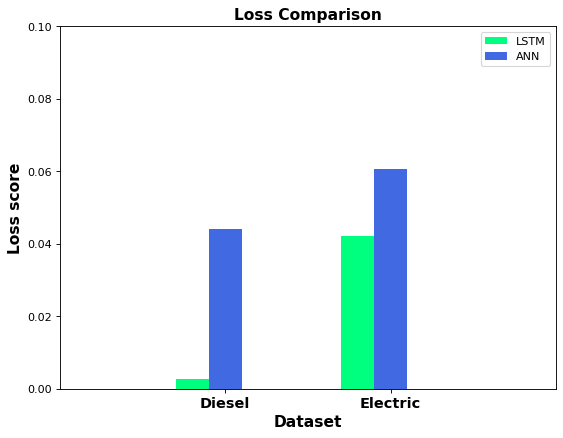

In [ ]:
## Final Results
fig, ax = plt.subplots(dpi=80,figsize=(8, 6))
# plt.figure(dpi=100,figsize=(8,6))
x = np.arange(2)
y1 = [D1[0],D2[0]]
y2 = [E1[0],E2[0]]
width = 0.2

ax.bar(x-0.2, y1, width, color='springgreen')
ax.bar(x, y2, width, color='royalblue',align='center')
plt.ylim([0,0.1])
plt.xlim([-1,2])
plt.xticks(x, ["Diesel", "Electric"],fontsize=13,fontweight='bold')
plt.xlabel("Dataset",fontsize=14,fontweight='bold')
plt.ylabel("Loss score",fontsize=14,fontweight='bold')
plt.title("Loss Comparison",fontsize=14,fontweight='bold')
plt.legend(['LSTM', 'ANN'],loc='upper right')
plt.savefig('LOSS.png')
plt.show()